# credit card 

# Table of Contents
* [Introduction](#Introduction)
* [Explore Data](#ExploreData)
* [Data Cleaning](#clean)
    * [Delete Feature](#deletefeature)
    * [Drop Duplicates](#dropduplicates)
    * [Fill Missing Values](#na)
    * [Age Feature](#age)
    * [Binary Columns](#bi)
    * [Unemployed Feature](#unemp)
    * [Years Employed](#yemp)
    * [Label Good or Bad Customers](#label)
    * [Merge Credit and Application Data](#merge)
    * [Rename Columns](#rename)
* [The New Data](#newdata)
* [Imbalance Ratio](#imb)
* [Univariate Analysis](#univariate)
* [Exploratory Data Analysis (EDA)](#eda)

    

# Introduction <a class="anchor"  id=""></a>
If someone comes to borrow money, would you lend it or not? Why? And if there are 1000 people who come to borrow money, how do you decide who to lend to and who to reject? This is happening in banks, and the decision-making process uses a tool called credit scoring. By using customer data, credit scoring predicts whether a customer will default on their loan after borrowing.

In this notebook, we will explore how likely customers are to default on their loans (Bad rate) based on their different characteristics. Let's take a look!

# data importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('application_record.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


# Explore data

In [3]:
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
data.sample()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
47966,5146393,F,N,Y,0,198000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-20514,365243,1,0,0,0,NaN,1.0


In [6]:
data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [7]:
data.shape

(438557, 18)

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.nunique()

id                     438510
code_gender                 2
flag_own_car                2
flag_own_realty             2
cnt_children               12
amt_income_total          866
name_income_type            5
name_education_type         5
name_family_status          5
name_housing_type           6
days_birth              16379
days_employed            9406
flag_mobil                  1
flag_work_phone             2
flag_phone                  2
flag_email                  2
occupation_type            18
cnt_fam_members            13
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe(exclude=[np.number])

,code_gender,flag_own_car,flag_own_realty,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [12]:
data.describe()

,id,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [13]:
data['occupation_type'].fillna(method="ffill", inplace=True)
data['occupation_type'].head()

0               NaN
1               NaN
2    Security staff
3       Sales staff
4       Sales staff
Name: occupation_type, dtype: object

In [14]:
data.sample(5)

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
45219,5135900,F,N,Y,2,90000.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,-12724,-2635,1,1,0,0,Core staff,4.0
84932,6052516,F,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-16901,-7731,1,0,0,0,Sales staff,2.0
343652,6415351,M,Y,N,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16647,-2150,1,0,0,0,Drivers,4.0
57435,5679121,F,Y,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13954,-190,1,0,0,0,Sales staff,2.0
412378,6782035,M,Y,N,0,81000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22990,365243,1,0,0,0,Laborers,2.0


In [15]:
data.columns

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members'],
      dtype='object')

In [16]:
col=['code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members']

In [17]:
for i in (col):
    print(i)
    print('-'*10)
    print(data[i].value_counts())
    print('*'*100)

code_gender
----------
F    294440
M    144117
Name: code_gender, dtype: int64
****************************************************************************************************
flag_own_car
----------
N    275459
Y    163098
Name: flag_own_car, dtype: int64
****************************************************************************************************
flag_own_realty
----------
Y    304074
N    134483
Name: flag_own_realty, dtype: int64
****************************************************************************************************
cnt_children
----------
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: cnt_children, dtype: int64
****************************************************************************************************
amt_income_total
----------
135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  


In [18]:
data.isnull().sum().sum()

2

In [19]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum().sum()

0

In [21]:
data.sample(3)

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
212252,5942874,F,N,Y,1,180000.0,State servant,Higher education,Married,House / apartment,-13268,-3499,1,0,0,0,Core staff,3.0
277862,6109099,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-19649,-3217,1,0,0,0,Laborers,2.0
428193,7471745,F,N,Y,1,382500.0,Working,Higher education,Separated,House / apartment,-17383,-4102,1,0,0,0,Core staff,2.0


In [22]:
data.dtypes

id                       int64
code_gender             object
flag_own_car            object
flag_own_realty         object
cnt_children             int64
amt_income_total       float64
name_income_type        object
name_education_type     object
name_family_status      object
name_housing_type       object
days_birth               int64
days_employed            int64
flag_mobil               int64
flag_work_phone          int64
flag_phone               int64
flag_email               int64
occupation_type         object
cnt_fam_members        float64
dtype: object

In [23]:
data.duplicated().sum()

0

In [24]:
data.shape

(438555, 18)

In [25]:
438555-344420

94135

In [26]:
data = data.drop_duplicates(subset=data.columns[1:], keep='first')

In [27]:
data.shape

(94135, 18)

In [28]:
data["code_gender"].replace(['F','M'], [1,0], inplace=True)
data["flag_own_car"].replace(['Y','N'], [1,0], inplace=True)
data["flag_own_realty"].replace(['Y','N'], [1,0], inplace=True)

In [29]:
data.sample()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
93925,5377272,1,1,1,1,135000.0,Working,Incomplete higher,Married,House / apartment,-10321,-1701,1,0,1,0,Accountants,3.0


In [30]:
data['years_employed'] = round((-data['days_employed']/365.25), 1)
data.loc[data['years_employed']<0, 'years_employed']=0

print('years_employed column:')
print(data['years_employed'].head())

years_employed column:
2     3.1
3     8.4
7     0.0
10    2.1
13    3.3
Name: years_employed, dtype: float64


In [31]:
data.sample(10)

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,years_employed
190332,5873064,1,0,0,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20918,365243,1,0,0,0,Core staff,2.0,0.0
322430,6276667,1,1,1,0,135000.0,Working,Secondary / secondary special,Single / not married,With parents,-8155,-652,1,0,0,1,Sales staff,1.0,1.8
294248,6154385,1,0,1,0,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-23015,-2194,1,0,1,0,High skill tech staff,2.0,6.0
5157,5024657,1,0,1,0,135000.0,Working,Higher education,Single / not married,House / apartment,-16988,-1434,1,1,1,0,Laborers,1.0,3.9
301168,6204477,0,1,1,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,-22684,365243,1,0,1,0,Laborers,2.0,0.0
332272,6354109,0,1,1,0,126000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20737,-1167,1,0,0,0,Security staff,2.0,3.2
168020,5792007,0,1,1,2,315000.0,Commercial associate,Higher education,Married,House / apartment,-12223,-1832,1,0,0,1,Managers,4.0,5.0
101173,5416645,1,0,0,0,157500.0,Pensioner,Higher education,Married,House / apartment,-22361,365243,1,0,1,0,Sales staff,2.0,0.0
208165,5929308,0,0,1,0,90000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-12878,-2512,1,1,1,0,Laborers,1.0,6.9
382040,6612300,0,1,1,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11386,-474,1,0,0,1,Cooking staff,3.0,1.3


In [32]:
data.drop('days_employed' , axis=1 , inplace = True)

In [33]:
data['cnt_fam_members']=data['cnt_fam_members'].astype(int)

In [34]:
data.columns

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth', 'flag_mobil',
       'flag_work_phone', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'years_employed'],
      dtype='object')

In [35]:
data.drop(['flag_work_phone', 'flag_phone','days_birth', 'flag_phone'] , axis=1 , inplace=True)

# <font color='blue'> Data visualization

In [36]:
# data category
def plot_cat(feature):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    
    if data[feature].nunique()==2:
        a=data[feature].value_counts()[0]
        b=data[feature].value_counts()[1]
        c=data[feature].value_counts().index
        ax=plt.pie(x=[a,b] , labels=c ,autopct='%1.2f%%')
        
    elif data[feature].nunique()==3:
        a=data[feature].value_counts()[0]
        b=data[feature].value_counts()[1]
        c=data[feature].value_counts()[2]
        d=data[feature].value_counts().index
        ax=plt.pie(x=[a,b,c] , labels=d ,autopct='%1.2f%%')
    else:
        a=data[feature].value_counts()[0]
        b=data[feature].value_counts()[1]
        c=data[feature].value_counts()[2]
        d=data[feature].value_counts()[3]
        e=data[feature].value_counts().index
        ax=plt.pie(x=[a,b,c,d] , labels=e ,autopct='%1.2f%%')
        
    plt.subplot(1,2,2)
    ax=sns.countplot(x=data[feature],hue=data.code_gender)
    plt.xticks(rotation=90)

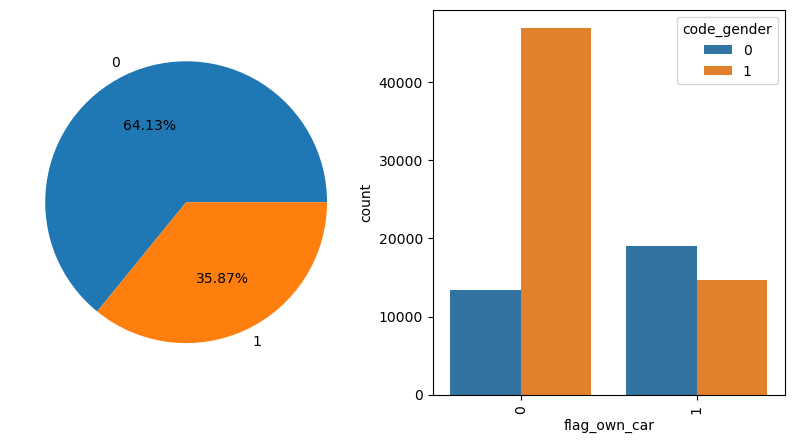

In [37]:
plot_cat('flag_own_car')

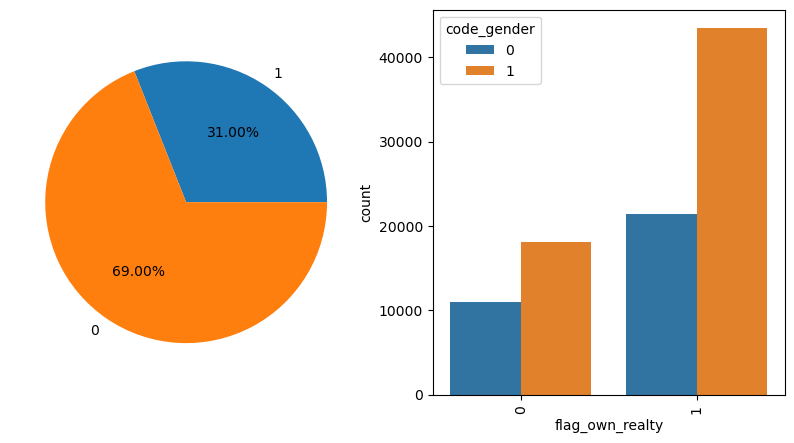

In [38]:
plot_cat('flag_own_realty')

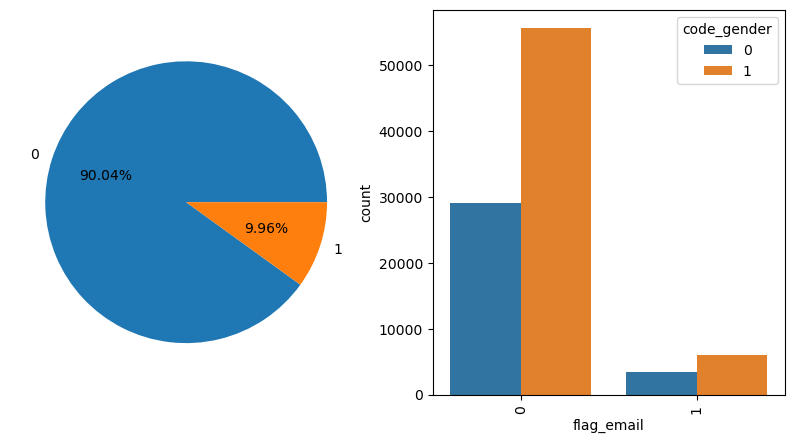

In [39]:
plot_cat('flag_email')

In [40]:
data.sample(2)

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_email,occupation_type,cnt_fam_members,years_employed
260476,6071463,0,0,0,0,247500.0,State servant,Secondary / secondary special,Married,Municipal apartment,1,0,Core staff,2,9.6
354793,6471803,1,0,1,2,112500.0,State servant,Higher education,Married,House / apartment,1,0,Laborers,4,3.2


In [41]:
data.nunique()

id                     94133
code_gender                2
flag_own_car               2
flag_own_realty            2
cnt_children              12
amt_income_total         866
name_income_type           5
name_education_type        5
name_family_status         5
name_housing_type          6
flag_mobil                 1
flag_email                 2
occupation_type           18
cnt_fam_members           13
years_employed           430
dtype: int64

In [42]:
def plot_num(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(y=data[feature] ,x=data.code_gender)
    plt.subplot(1,2,2)
    sns.histplot(x=data[feature] ,kde=True)

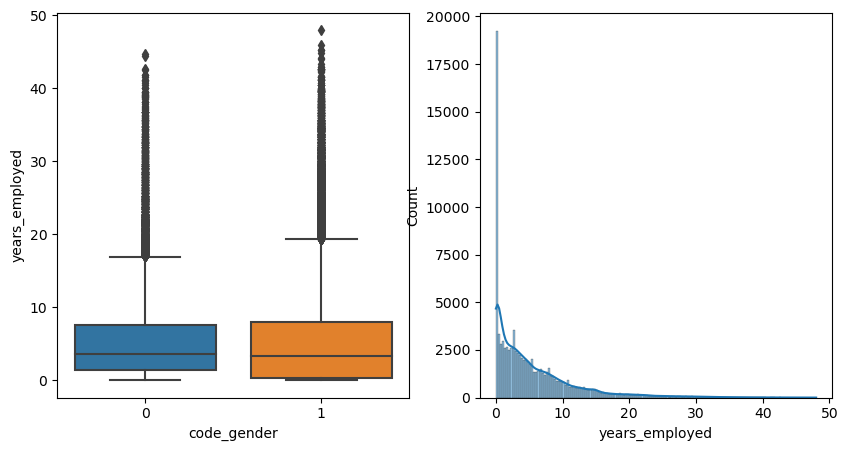

In [43]:
plot_num('years_employed')

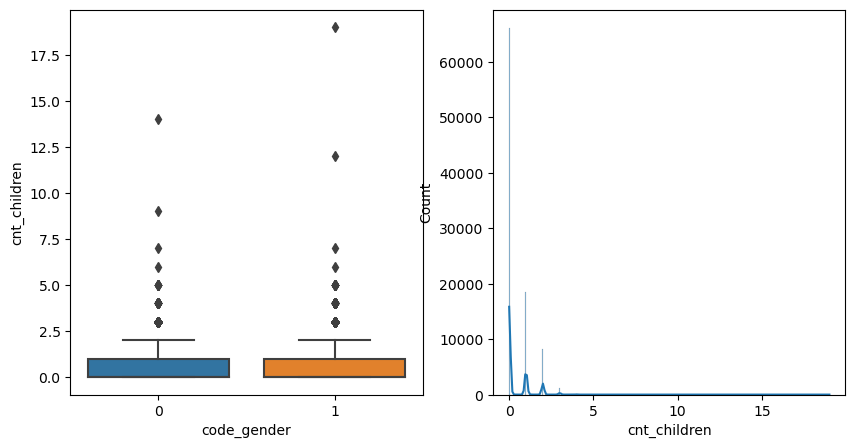

In [44]:
plot_num('cnt_children')

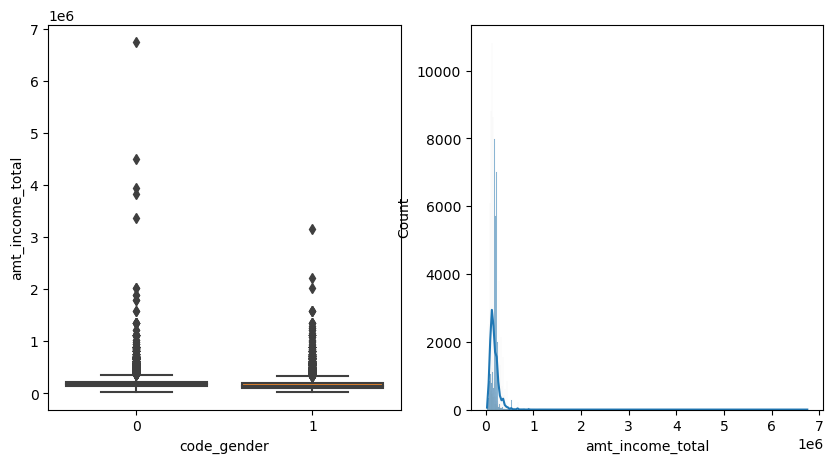

In [45]:
plot_num('amt_income_total')

In [48]:
data2=pd.read_csv('credit_record--.csv')

In [49]:
data2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [51]:
data2.columns=data2.columns.str.lower()

In [53]:
data = data.merge(data2,how='inner',on=['id'])
data.shape

(220121, 17)

In [54]:
data.sample(3)

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_email,occupation_type,cnt_fam_members,years_employed,months_balance,status
118604,5089976,0,0,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,Laborers,2,30.3,-30,C
13402,5022385,0,1,1,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,Sales staff,2,0.3,-23,C
37379,5029767,1,0,1,0,112500.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,Medicine staff,2,2.2,-34,C


In [56]:
data.isna().sum()

id                     0
code_gender            0
flag_own_car           0
flag_own_realty        0
cnt_children           0
amt_income_total       0
name_income_type       0
name_education_type    0
name_family_status     0
name_housing_type      0
flag_mobil             0
flag_email             0
occupation_type        0
cnt_fam_members        0
years_employed         0
months_balance         0
status                 0
dtype: int64

In [59]:
# seprating categorical and numerical columns

categorical_columns = []
numerical_columns = []
for i in data.columns:
    if data[i].dtype=="O":
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

# removing target columns from list
categorical_columns.remove("status")

In [62]:
# labeling target 1---> Good 0---->Bad credit
def convert(value):
    if int(value) in (2,3,4,5):
        target = 0
    else:
        target = 1
    
    return target
# conveting target categorical value into numerical
data.loc[data['status']=='C','status']=6
data.loc[data['status']=='X','status']=7   


data["status"] =  data["status"].map(convert)

In [70]:
for value in categorical_columns:
    print(value)
    print('-'*10)
    print(data[value].value_counts())
    print('*'*100)

name_income_type
----------
Working                 110282
Commercial associate     53433
Pensioner                39439
State servant            16902
Student                     65
Name: name_income_type, dtype: int64
****************************************************************************************************
name_education_type
----------
Secondary / secondary special    152709
Higher education                  56347
Incomplete higher                  8042
Lower secondary                    2836
Academic degree                     187
Name: name_education_type, dtype: int64
****************************************************************************************************
name_family_status
----------
Married                 150751
Single / not married     28302
Civil marriage           17948
Separated                13420
Widow                     9700
Name: name_family_status, dtype: int64
***********************************************************************************

In [74]:
for value in numerical_columns:
    print(value)
    print('-'*10)
    print(data[value].value_counts())
    print('*'*100)

id
----------
5024978    61
5033813    61
5091512    61
5105682    61
5068573    61
           ..
5038727     1
5135310     1
5112867     1
5052730     1
5105233     1
Name: id, Length: 9747, dtype: int64
****************************************************************************************************
code_gender
----------
1    143416
0     76705
Name: code_gender, dtype: int64
****************************************************************************************************
flag_own_car
----------
0    137597
1     82524
Name: flag_own_car, dtype: int64
****************************************************************************************************
flag_own_realty
----------
1    144996
0     75125
Name: flag_own_realty, dtype: int64
****************************************************************************************************
cnt_children
----------
0     156007
1      41638
2      18913
3       2997
4        363
5        115
14        59
7         23
19         6
Nam

In [75]:
x=data.iloc[::-1]
y=data['status']



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
categorical_columns

['name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type']

In [79]:
numerical_columns

['id',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'flag_mobil',
 'flag_email',
 'cnt_fam_members',
 'years_employed',
 'months_balance']

# <font color='blue'> Data Preprocessing

In [76]:

from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
# Preprocessing for numerical data
numerical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer()), ('scaler',StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer=Pipeline(steps=[
    ('cat',OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['code_gender','flag_own_car','flag_own_realty',
                                        'cnt_children','amt_income_total','flag_mobil','flag_email','cnt_fam_members',
                                        'years_employed','months_balance']),
        
        ('cat', categorical_transformer, ['name_income_type',
                                          'name_education_type','name_family_status',
                                          'name_housing_type','occupation_type'])])    
    
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)    

In [83]:
x_train_preprocessed

array([[ 0.73119477,  1.29188638,  0.7188521 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.73119477, -0.77406188,  0.7188521 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.73119477, -0.77406188,  0.7188521 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.36762467, -0.77406188,  0.7188521 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.73119477, -0.77406188, -1.39110673, ...,  0.        ,
         0.        ,  0.        ],
       [-1.36762467, -0.77406188,  0.7188521 , ...,  0.        ,
         1.        ,  0.        ]])

# <font color='blue'> Modeling

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = 'gini')
dt.fit(x_train_preprocessed,y_train)
y_pred=dt.predict(x_test_preprocessed)

# Use score method to get accuracy of model
score=dt.score(x_test_preprocessed , y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9966155593412833


In [86]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0).fit(x_train_preprocessed, y_train)
score=clf.score(x_test_preprocessed, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9949574105621806


In [87]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=1)
clf.fit(x_train_preprocessed,y_train)
clf.score(x_test_preprocessed , y_test)

H:\install anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9949574105621806

In [88]:
from sklearn.svm import SVC
clf.fit(x_train_preprocessed, y_train)
score = clf.score(x_test_preprocessed, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9949574105621806


H:\install anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='status', ylabel='cnt_children'>

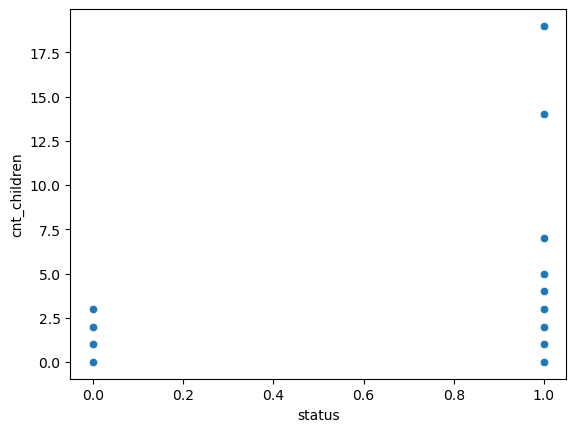

In [94]:
sns.scatterplot(x=data['status'], y=data['cnt_children'])

<AxesSubplot:xlabel='status', ylabel='occupation_type'>

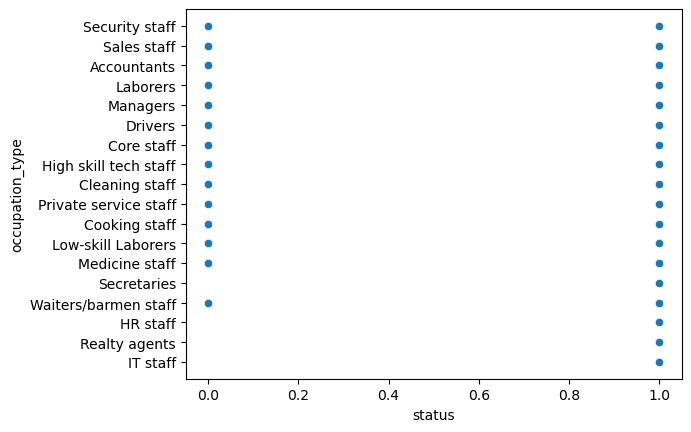

In [95]:
sns.scatterplot(x=data['status'], y=data['occupation_type'])